In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
import time
all_files = glob.glob('*.csv')

temp = []
for filename in all_files:
    df = pd.concat((pd.read_csv(f) for f in all_files))
    temp.append(df)
frame = pd.concat(temp, axis=0, ignore_index=True)

In [4]:
frame = frame.drop('No', 1)


In [5]:
#fetch train-data and test_data
train_data=frame.loc[frame['year']!=2017 ]
test_data=frame.loc[frame['year']==2017]
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,2017,1,1,0,497.0,580.0,8.0,112.0,6800.0,4.0,-5.3,1018.3,-7.1,0.0,S,0.8,Gucheng
33649,2017,1,1,1,476.0,546.0,7.0,111.0,6800.0,4.0,-5.4,1018.7,-7.1,0.0,S,1.1,Gucheng
33650,2017,1,1,2,475.0,546.0,7.0,114.0,6800.0,4.0,-5.9,1018.8,-7.6,0.0,S,1.5,Gucheng
33651,2017,1,1,3,447.0,509.0,6.0,118.0,6700.0,4.0,-6.5,1018.8,-8.0,0.0,SSE,0.7,Gucheng
33652,2017,1,1,4,432.0,470.0,6.0,115.0,6800.0,3.0,-6.9,1018.1,-8.4,0.0,WSW,0.3,Gucheng
33653,2017,1,1,5,420.0,461.0,6.0,115.0,6800.0,3.0,-6.8,1017.5,-8.3,0.0,S,1.4,Gucheng
33654,2017,1,1,6,410.0,461.0,6.0,119.0,6900.0,3.0,-7.1,1017.6,-8.6,0.0,S,1.3,Gucheng
33655,2017,1,1,7,423.0,481.0,7.0,120.0,6900.0,3.0,-7.5,1018.3,-8.9,0.0,S,0.7,Gucheng
33656,2017,1,1,8,432.0,482.0,6.0,113.0,7000.0,3.0,-8.1,1018.7,-9.6,0.0,NNW,0.5,Gucheng
33657,2017,1,1,9,421.0,477.0,7.0,112.0,7200.0,3.0,-6.3,1019.0,-7.7,0.0,S,0.6,Gucheng


In [6]:
#initialize x and y
x_train_TEMP=np.array(train_data['TEMP'].values)
x_train_PRES=np.array(train_data['PRES'].values)
x_train_DEWP=np.array(train_data['DEWP'].values)
x_train_RAIN=np.array(train_data['RAIN'].values)
x_train_wd=np.array(train_data['wd'].values)
x_train_WSPM=np.array(train_data['WSPM'].values)

x_test_TEMP=np.array(test_data['TEMP'].values)
x_test_PRES=np.array(test_data['PRES'].values)
x_test_DEWP=np.array(test_data['DEWP'].values)
x_test_RAIN=np.array(test_data['RAIN'].values)
x_test_wd=np.array(test_data['wd'].values)
x_test_WSPM=np.array(test_data['WSPM'].values)

y_train=np.array(train_data['PM2.5'].values)
y_test=np.array(test_data['PM2.5'].values)

#multidimentional data
x_train=np.array(train_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)
x_test=np.array(test_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)


In [7]:
#this method receives 2 sets, one is the training set one is the label
#this method will train a linear model for 1-d and return it
#eta--the learing rate
def train_simple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder('float')
    y=tf.placeholder('float')
    weight=tf.Variable(np.random.normal())
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    result=tf.add(tf.multiply(weight,x),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.GradientDescentOptimizer(eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        return X_test,Y_test,prediction
        
        
        
    
            
        
            

In [8]:
def plot_simple(X,Y,X_test,Y_test,eta,epochs):
    x1,y1=removeNan(X,Y)
    x2,y2=removeNan(X_test[:min(X_test.shape[0],Y_test.shape[0])],Y_test[:min(X_test.shape[0],Y_test.shape[0])])
    x,y,pred=train_simple(x1,y1,x2,y2,eta,epochs)
    plt.scatter(x2,y2,c='r',s=0.005)
    plt.plot(x2,pred,c='g')
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.ylim(np.min(y2),np.max(y2))
    plt.show()

In [9]:
# remove all nan's from x and y
#if x(or y) contains nan on index i then remove the the i th element from both lists
def removeNan(X,Y):
    temp1 = np.argwhere(np.isnan(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2

def removeNan_str(X,Y):
    temp1 = np.argwhere(pd.isnull(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2
    

In [10]:
# represent the wind's direction as a number (radius)
#this method receives a set and change everything to a number
def getWindAngle(Z):
    Y=[]
    for direct in Z:
        if pd.isnull(direct):
            Y.append(math.nan)
        elif direct =='SW':
            Y.append(np.radians(225))
        elif direct =='N':
            Y.append(np.radians(0))
        elif direct =='NNW':
            Y.append(np.radians(337.5))
        elif direct =='WNW':
            Y.append(np.radians(292.5))
        elif direct =='WSW':
            Y.append(np.radians(247.5))
        elif direct =='E':
            Y.append(np.radians(90))
        elif direct =='NE':
            Y.append(np.radians(45))
        elif direct =='ENE':
            Y.append(np.radians(67.5))
        elif direct =='ESE':
            Y.append(np.radians(112.5))
        elif direct =='S':
            Y.append(np.radians(180))
        elif direct =='SE':
            Y.append(np.radians(135))
        elif direct =='SSE':
            Y.append(np.radians(157.5))
        elif direct =='SSW':
            Y.append(np.radians(202.5))
        elif direct =='NNE':
            Y.append(np.radians(22.5))
        elif direct =='NW':
            Y.append(np.radians(315.5))
        elif direct =='W':
            Y.append(np.radians(270))
        
    return np.array(Y)
        
            
            
    

In [29]:
#check how many directions
print(set(x_train_wd))

{nan, 'NE', 'N', 'SE', 'WNW', 'E', 'S', 'SW', 'SSW', 'NNE', 'ESE', 'NW', 'W', 'WSW', 'ENE', 'NNW', 'SSE'}


In [11]:
def plot_simple_wind(eta,epochs):
    # this step removes all nans in wind and y then change the string in wd to numbers
    global x_train_wd,y_train,x_test_wd,y_test
    wd_new,y_new=removeNan_str(x_train_wd,y_train)
   
    wd_test,y_test=removeNan_str(x_test_wd,y_test)
    wd_test,y_test=wd_test[:min(wd_test.shape[0],y_test.shape[0])],y_test[:min(wd_test.shape[0],y_test.shape[0])]
    wd_new=getWindAngle(wd_new)
    wd_test=getWindAngle(wd_test)
    x,y,pred=train_simple(wd_new,y_new,wd_test,y_test,eta,epochs)
    plt.scatter(wd_test,y_test,c='r',s=0.01)
    plt.plot(wd_test,pred,c='g')
    plt.yscale('linear')
    plt.show()
    
    

cost:11151.9853515625
w:5.334071636199951
b:1.0104475021362305

cost:9149.138671875
w:2.9097278118133545
b:4.83447790145874

cost:8896.6826171875
w:2.7010345458984375
b:8.585274696350098

cost:8666.158203125
w:2.5447044372558594
b:12.176518440246582

cost:8455.048828125
w:2.395993709564209
b:15.613240242004395

cost:8261.72265625
w:2.253702402114868
b:18.902048110961914

cost:8084.677734375
w:2.117534637451172
b:22.049312591552734

cost:7922.544921875
w:1.9872277975082397
b:25.061124801635742

cost:7774.06640625
w:1.8625293970108032
b:27.943309783935547

cost:7638.0947265625
w:1.7431975603103638
b:30.701452255249023

cost:7513.57421875
w:1.629001498222351
b:33.34088897705078

cost:7399.54150390625
w:1.5197203159332275
b:35.86672592163086

cost:7295.11376953125
w:1.4151430130004883
b:38.28384780883789

cost:7199.48193359375
w:1.3150663375854492
b:40.59694290161133

cost:7111.90380859375
w:1.2192963361740112
b:42.81049346923828

cost:7031.7021484375
w:1.1276484727859497
b:44.928768157958

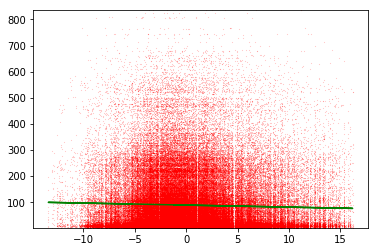

In [199]:
#this part is for part one except wind
plot_simple(x_train_TEMP,y_train,x_test_TEMP,y_test,0.0028,1550)

In [ ]:
# this part is for part 1 wind
plot_simple_wind(0.005,500)

In [79]:
 print(x_test_wd.shape, y_test.shape)

(203904,) (181070,)


In [12]:
#preprocess the training matrix and its label so that it contains no nan's 
#then replace the str angle with numerical one
a=set(np.argwhere(pd.isnull(x_train))[:,0])
b=set(np.argwhere(pd.isnull(y_train))[:,0])
indices=list(a.union(b))
x_newTrain=np.delete(x_train,indices,axis=0)
y_newTrain=np.delete(y_train,indices,axis=0)
angles=getWindAngle(x_newTrain[:,4])
x_newTrain[:,4]=angles
print(x_newTrain)
print(pd.isnull(x_newTrain))

[[0.1 1021.1 -18.6 0.0 5.50651379004211 4.4]
 [-0.3 1021.5 -19.0 0.0 5.50651379004211 4.0]
 [-0.7 1021.5 -19.8 0.0 5.105088062083414 4.6]
 ...
 [-2.3 1022.7 -6.7 0.0 3.141592653589793 1.1]
 [-3.4 1023.6 -6.9 0.0 0.39269908169872414 1.0]
 [-3.8 1023.3 -5.8 0.0 2.356194490192345 1.2]]
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 ...
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]


In [13]:
#do that same thing for test data
x_test1=x_test[:min(x_test.shape[0],y_test.shape[0]),:]
y_test1=y_test[:min(x_test.shape[0],y_test.shape[0])]
c=set(np.argwhere(pd.isnull(x_test1))[:,0])
d=set(np.argwhere(pd.isnull(y_test1))[:,0])
indices=list(c.union(d))
x_newTest=np.delete(x_test1,indices,axis=0)
y_newTest=np.delete(y_test1,indices,axis=0)
angles1=getWindAngle(x_newTest[:,4])
x_newTest[:,4]=angles1
print(x_newTest)

[[-5.3 1018.3 -7.1 0.0 3.141592653589793 0.8]
 [-5.4 1018.7 -7.1 0.0 3.141592653589793 1.1]
 [-5.9 1018.8 -7.6 0.0 3.141592653589793 1.5]
 ...
 [9.1 1014.6 -12.7 0.0 0.7853981633974483 1.7]
 [7.1 1015.2 -13.2 0.0 5.105088062083414 1.8]
 [7.4 1014.9 -11.9 0.0 0.0 1.4]]


In [14]:

#this method is to give a model(multidimensional)
def train_multiple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        return X_test,Y_test,prediction

In [104]:
#this method is to give a model(multidimensional)
def train_multiple_SGD(X,Y,X_test,Y_test,eta,epochs,size):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            start=time.time()
            indices=np.random.choice(range(X.shape[0]), size, replace=False)
            feed_dict={x:X[indices],y:Y[indices]}
            sess.run(optimizer,feed_dict=feed_dict)
            print('time spent on this epoch:{}'.format(time.time()-start))
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test}).T[0]
        return X_test,Y_test,prediction,weight.eval().T[0],bias.eval()

    

In [331]:
#if you set the size to be the original one, your runnin out of memory
#so this way is not efficient, we have to use the stochastic one
size=int(x_newTrain.shape[0]/500)
train_multiple(x_newTrain[:size],y_newTrain[:size],x_newTest,y_newTest,0.0039,500)


cost:667832.875
w:[[ 0.2108975 ]
 [-0.7213204 ]
 [ 0.7439816 ]
 [-1.0230656 ]
 [ 0.04050484]
 [ 1.0644834 ]]
b:-1.4994467496871948



KeyboardInterrupt: 

In [106]:
#test of sgd 
#we gotta choose the best size for stochastic gradient descent
size=int((x_newTrain.shape[0])/1500)
x_t,y_t,pred,w,b=train_multiple_SGD(x_newTrain,y_newTrain,x_newTest,y_newTest,0.03,100,size)


time spent on this epoch:1.9555680751800537
cost:2264652.25
w:[[ 0.48893178]
 [ 1.5552602 ]
 [ 0.76533747]
 [-1.3141626 ]
 [ 0.53671217]
 [ 0.99895024]]
b:-1.8750108480453491

time spent on this epoch:1.5987110137939453
time spent on this epoch:1.6232562065124512
time spent on this epoch:1.5873379707336426
time spent on this epoch:1.5990169048309326
time spent on this epoch:1.848797082901001
time spent on this epoch:1.858018159866333
time spent on this epoch:1.8869349956512451
time spent on this epoch:1.9090039730072021
time spent on this epoch:2.0211899280548096
time spent on this epoch:1.883223056793213
time spent on this epoch:1.7392656803131104
time spent on this epoch:1.6726162433624268
time spent on this epoch:1.6750378608703613
time spent on this epoch:1.8687419891357422
time spent on this epoch:2.361895799636841
time spent on this epoch:1.7915513515472412
time spent on this epoch:1.8935177326202393
time spent on this epoch:1.8142199516296387
time spent on this epoch:2.032614946

In [130]:
np.mean(abs(np.dot(np.array(x_newTrain,dtype='float32'),w)+b-y_newTrain)/np.dot(np.array(x_newTrain,dtype='float32'),w)+b)

-2.514512094081435

In [324]:
x_newTest.shape

(167079, 6)